<TransferFunction>: sys[653]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                -7.007 s
  ------------------------------------
  s^4 + 35.71 s^3 + 39.48 s^2 + 1410 s
<TransferFunction>: sys[655]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                 -44.03
  ------------------------------------
  s^4 + 35.71 s^3 + 39.48 s^2 + 1410 s


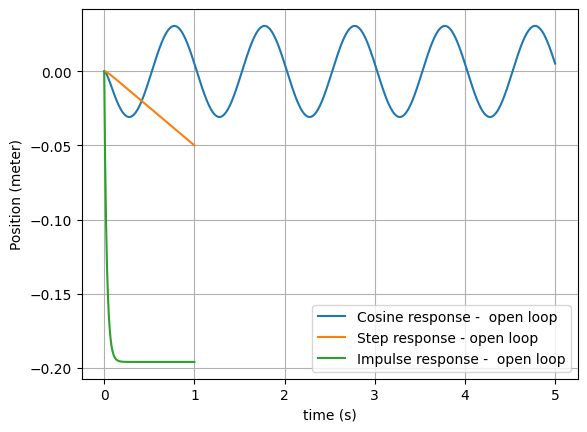

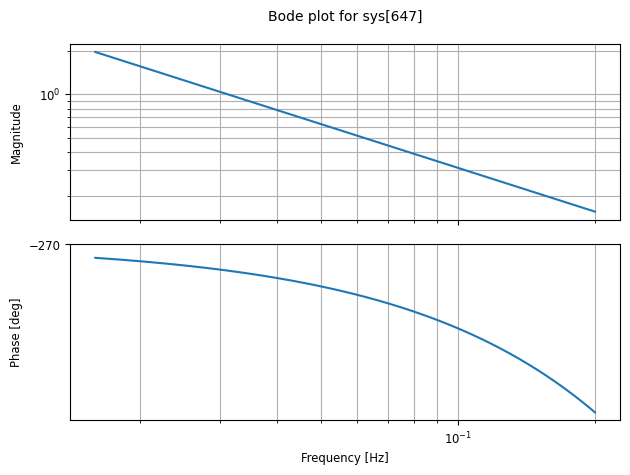

In [ ]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# maybe change it to be theta and not alpha, because maybe not really plant.
# open loop plant (idk if cool?)
g = 9.81
# d = 0.0375
# L = 0.1725
b = 0.00 # total guess
m = 0.05 # weight of ball
R = 0.02

# num = [-5/7*g*(d/L)] # this technically makes the tf x/alpha, with alpha equals the angle of the motor, not that of the beam.
num = [-5/7*g] # this equals tf = x/theta, the angle of the beam
den = [1, (5*b)/(7*m*R), 0]

G_plant = tf(num, den)

# step response and pulse response:
step = tf([1],[1,0])
Y_step = G_plant * step
pulse = tf([1],[1])
Y_pulse = G_plant * step

# t = np.linspace(0, 10, 500)
# omega = 2 * np.pi * 10  # 10 Hz
# phi = np.pi/12 * np.cos(omega * t)

# # Simulate
# t_out, y_out = forced_response(G_plant, t, phi)

# plt.plot(t_out, y_out, label='Output (ball position)')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.grid(True)
# plt.show()

f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0],[1,0,a**2])
Y_cosine = G_plant * cos
print(Y_cosine)

sin = tf([a],[1,0,a**2])
Y_sine = G_plant * sin
print(Y_sine)

# show actual equations
# print('input pulse = ', step)
# print('plant transfer function = ', G_plant)
# print('output Y = ', Y_step)
# print('input pulse = ', pulse)
# print('plant transfer function = ', G_plant)
# print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_plant,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
y_angle = y*(np.pi/12) # change to whatever angle we want to try as a step.
t2,yc = impulse_response(G_plant,T=1,T_num=200)
t3,yc2 = impulse_response(Y_sine, T=5, T_num=1000)
t4,yc3 = impulse_response(Y_cosine, T=5, T_num=1000)

# plt.plot(t3,yc2, label='Sine response -  open loop')
plt.plot(t4,yc3, label='Cosine response -  open loop')

plt.plot(t,y_angle, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')

plt.grid()
plt.xlabel('time (s)') # unsure if should be angle
plt.ylabel('Position (meter)')
plt.legend()

w = np.logspace(-1,0.1,10000)   #set omega range
bode_plot(G_plant,w,deg=True,Hz=True)


G_motor =  <TransferFunction>: sys[667]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      0.28
  -------------
  s^2 + 6.614 s
input step =  <TransferFunction>: sys[668]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
motor transfer function =  <TransferFunction>: sys[667]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      0.28
  -------------
  s^2 + 6.614 s
output Y =  <TransferFunction>: sys[669]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       0.28
  ---------------
  s^3 + 6.614 s^2
input pulse =  <TransferFunction>: sys[670]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1
motor transfer function =  <TransferFunction>: sys[667]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      0.28
  -------------
  s^2 + 6.614 s
output Y =  <TransferFunction>: sys[671]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       0.28
  ---------------
  s^3 + 6.614 s^2


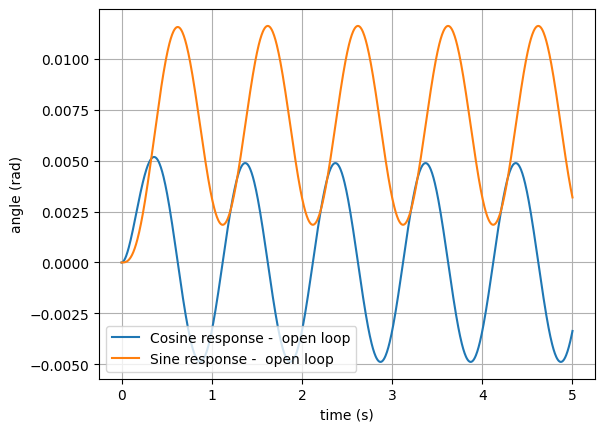

In [70]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# open loop motor
# values taken from https://ctms.engin.umich.edu/CTMS/index.php?example=MotorPosition&section=SystemModeling
# J = 3.3*10**-6
# b_m = 3.5*10**-6
# K = 0.0274
# L_m = 0 # think if we neglect it, e.g; let it be 0
# R_E = 4 # guess, could maybe also be ~12 or 20, need to check notes.

# num = [K]
# den = [J*L_m, (R_E*J)+(b_m*L_m), (K**2)+(b_m*R_E), 0]

K = 0.28
T_m = 0.1512

num = [K]
den = [1,1/T_m]

G_motor = tf(num, den)
integrator = tf([1],[1,0]) # integrator
G_motor = G_motor*integrator # integrate to get position

# step response and pulse response:
step = tf([1],[1,0]) # figire out of numerator value matters.
Y_step = G_motor * step
pulse = tf([1],[1])
Y_pulse = G_motor * step

f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0],[1,0,a**2])
Y_cosine = G_motor * cos
sine = tf([a],[1,0,a**2])
Y_sine = G_motor * sine

# show actual equations
print('G_motor = ', G_motor)
print('input step = ', step)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_motor,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_motor,T=1,T_num=200)
t4,yc3 = impulse_response(Y_cosine, T=5, T_num=1000)
t3,yc2 = impulse_response(Y_sine, T=5, T_num=1000)

plt.plot(t4,yc3, label='Cosine response -  open loop')
plt.plot(t3,yc2, label='Sine response -  open loop')
# plt.plot(t,y, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()


G_total = G_plant*G_motor <TransferFunction>: sys[714]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            -1.962
  ---------------------------
  s^4 + 42.33 s^3 + 236.2 s^2
G_cosine =  <TransferFunction>: sys[720]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                           -1.962 s
  ----------------------------------------------------------
  s^6 + 42.33 s^5 + 1223 s^4 + 4.178e+04 s^3 + 2.331e+05 s^2
G_sine =  <TransferFunction>: sys[722]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                            -61.64
  ----------------------------------------------------------
  s^6 + 42.33 s^5 + 1223 s^4 + 4.178e+04 s^3 + 2.331e+05 s^2
G_total =  <TransferFunction>: sys[714]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            -1.962
  ---------------------------
  s^4 + 42.33 s^3 + 236.2 s^2
input pulse =  <TransferFunction>: sys[715]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
total transfer function =  <TransferFunction>: sys[714]
Inputs (1): ['u[0]']

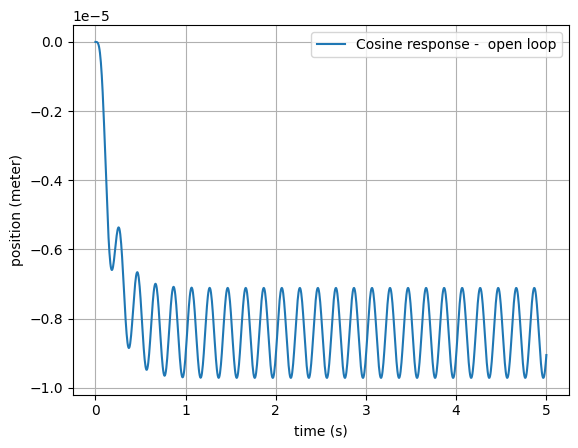

In [73]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


# open loop plant+motor
G_total = G_plant*G_motor
print('G_total = G_plant*G_motor', G_total)
# maybe add response step, pulse, with/without IC

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_total * step
pulse =tf([1],[1])
Y_pulse = G_total * step


f = 5 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0],[1,0,a**2]) # scale sine by a factor np.pi/12
Y_cosine = G_total * cos
print('G_cosine = ', Y_cosine)

sine = tf([a],[1,0,a**2])
Y_sine = G_total * sine
print('G_sine = ', Y_sine)


print('G_total = ', G_total)
# show actual equations
print('input pulse = ', step)
print('total transfer function = ', G_total)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('total transfer function = ', G_total)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_total,T=1,T_num=1000, X0=0)#X0 can be set as initial condition

t4,yc3= impulse_response(Y_cosine, T=5, T_num=1000)
t3,yc2 = impulse_response(Y_sine, T=5, T_num=1000)

plt.plot(t4,yc3, label='Cosine response -  open loop')
# plt.plot(t3,yc2, label='Sine response -  open loop')

# y_pos = y*6 # scaled by 6 for a 6v step ?
# t2,yc = impulse_response(G_total,T=1,T_num=200)
# plt.plot(t,y_pos, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('position (meter)')
plt.legend()






PID =  <TransferFunction>: sys[782]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  10 s
  ----
   s
G_controlled =  <TransferFunction>: sys[785]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                -19.62 s
  -------------------------------------
  s^5 + 42.33 s^4 + 236.2 s^3 - 19.62 s


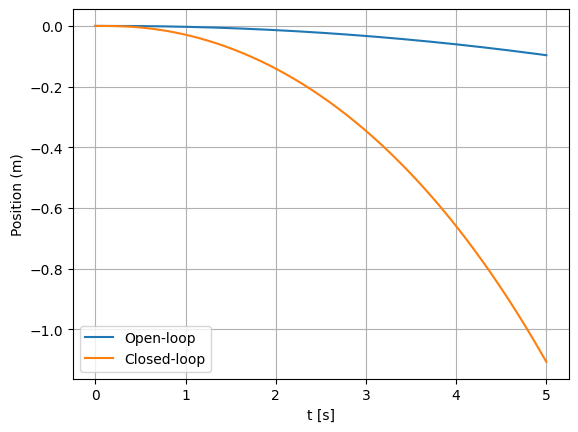

In [81]:
# add PI controller (now it is closed loop)
Kp,Ki,Kd=10,0,0 # idk if this way of defining is allowed. d = 0 because otherwise deg(num) > deg(den)
den = [1, 0]
controller= tf([Kd,Kp,Ki],den)
print('PID = ', controller)

G_control = controller*G_total
G_controlled = feedback(G_control,[1],-1)  #GF is forward gain, [1] is unity feedback loop with -1 indicating negative feedback

print('G_controlled = ', G_controlled)

# w = np.logspace(-1,3,100)   #set omega range
# bode_plot(G_controlled,w,dB=True,deg=False)

t2, yc = step_response(G_controlled,T=5,T_num=1000,X0=-0.0)
t, y = step_response(G_total,T=5,T_num=1000,X0=0)  
plt.plot(t,y, label='Open-loop')
plt.plot(t2,yc, label='Closed-loop')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('Position (m)')
plt.legend()

#impulse_response(g,T=10,T_num=200)




# TODO add bode plots and pole zero plot at what places?